# Problem Statement: Airbnb Hotel Booking Analysis.

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

QUESTIONS

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data.

1.What are the different property types in the Dataset?

2.Which neighborhood group has the highest number of listings?

3.Which neighborhoods group have the highest average prices for Airbnb listings?

4.Is there a relationship between the construction year of property and price?

5.Who are the top 10 hosts by calculated host listing count?

6.Are hosts with verified identities more likely to receive positive reviews?

7.Is there a correlation between the price of a listing and its service fee?

8.What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

9.Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

DATA WRANGLING

Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [35]:
# Read the AirBnb Data
df = pd.read_excel('Data.xlsx')

# Access The Data

In [38]:
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [42]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [63]:
#Neighbourhood group was 'brookln' instead of 'brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,price_$,service_fee_$
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,2010.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,580.0,116.0


# Problems Identified within the Data

541 duplicated Records where found in the Data.

Insufficient information were recorded for the house_rules and Licence columns.

Dollar signs and commas recorded along with the values for price and service fee.

The currency for price and service fee were not added to the column's titles.

Missing values in some records

Columns like the price, service fee, id, host id, last review, Construction year are assigned

In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records

Some outliers were identified in the availability 365 column.

CLEAN THE DATA

Steps to be Taken for Data Cleaning

Drop duplicated records.

Drop house_rules and license columns with insufficient data.

Remove all dollar signs in the price and service fee columns.

Remove all commas from the price and service fee columns.

Rename the price and service fee columns to include a dollar signs.

Drop all records with missing values.

Change all mismatched data types to the appropriate once.

Correct the Spelling of 'brookln' to 'Brooklyn'

Get rid of outliers in the 'availability 365' column data.

In [73]:
#Drope duplicate records
df.drop_duplicates(inplace=True)

In [81]:
#drope house_rules and locense colums with insufficient data
print(df.columns)


Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'price_$',
       'service_fee_$'],
      dtype='object')


In [91]:
#Remove all doller signs in the price and service fee column
df['price_$'] = df['price_$'].astype(str).str.replace('$', '', regex=False)
df['service_fee_$']=df['service_fee_$'].astype(str).str.replace('$', '', regex=False)

#Remove all comma in price and service fee columns
df['price_$'] = df['price_$'].str.replace(',', '', regex=False)
df['service_fee_$']=df['service_fee_$'].str.replace(',', '', regex=False)

#Drope all records with missing values
df.dropna(inplace=True)

#change all mismatched datatype to the appropriate once.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'])
df['construction_year'] = df['construction_year'].astype(int)

#correct the spelling of brookln to Brooklyn
df.loc[df['neighbourhood_group']=='brookln','neighbourhood_group',]='Brooklyn'

#Get rid of outliers in the 'availability 365' column data
df=df.drop(df[df['availability_365']>500].index)

In [93]:
df.duplicated().value_counts()

False    83389
Name: count, dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   name                            83389 non-null  object        
 2   host_id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host_name                       83389 non-null  object        
 5   neighbourhood_group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country_code                    83389 non-null  object        
 11  instan

# What are the different property types in the Dataset?

In [100]:
#what are the different property types in the Dataset?
property_types = df['room_type'].value_counts().to_frame()
property_types

,count
room_type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


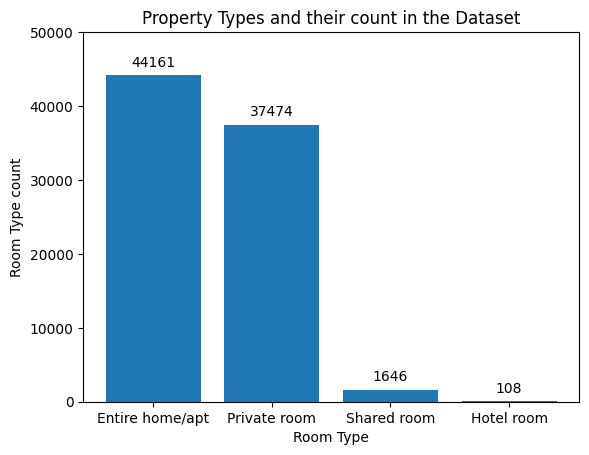

In [104]:
#Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type count');
plt.title('Property Types and their count in the Dataset');

# The Airbnb open dataset reveals four distinct property or room types. These categories comprise:

Entire home/apt

Private room

Shared room

Hotel room

Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,163 occurrences, followed by Private room with 37,494 occurrences. Shared room and Hotel room trail behind with 1,646 and 108 occurrences, respectively.

# Which neighborhood group has the highest number of listings?

In [107]:
hood_group = df['neighbourhood_group'].value_counts().to_frame()
hood_group

,count
neighbourhood_group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


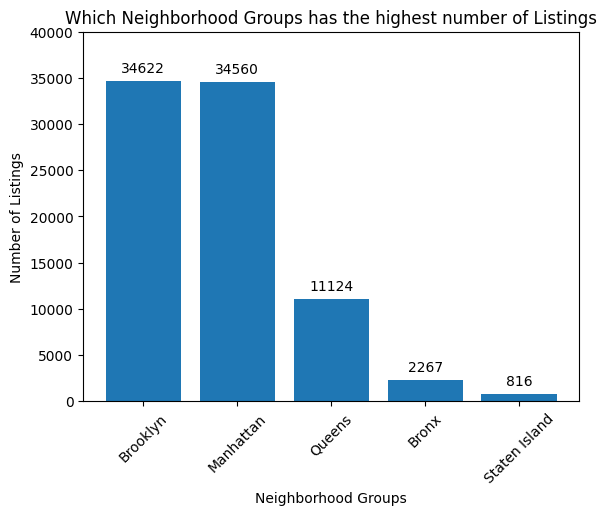

In [110]:
#Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, "count"], padding = 4 );
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

The dataset contains five different neighborhood groups, namely Brooklyn, Manhattan, Queens, Bronx, and Staten Island. According to the barchart, Brooklyn has the highest number of listings with 34636, followed closely by Manhattan with 34566.

# Which neighborhoods group have the highest average prices for Airbnb listings?

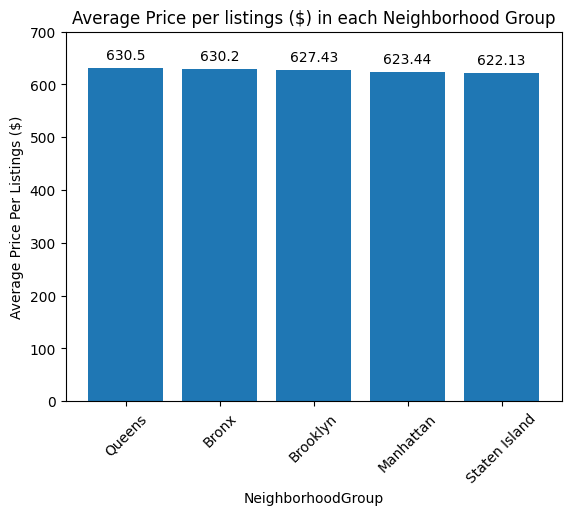

In [116]:
#Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood_group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:, "price_$"],2),label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('NeighborhoodGroup');
plt.ylabel('Average Price Per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per listings ($) in each Neighborhood Group');

Among the five identified neighborhood groups in the dataset, Queens boasts the highest average listing price at 630.46 USD, closely trailed by the Bronx with an average listing price of 630.20 USD. Conversely, Staten Island records the lowest average listing price at 622.13 USD.

# Is there a relationship between the construction year of property and price?

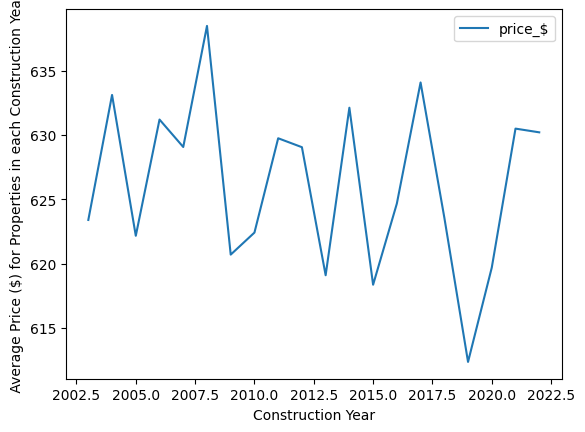

In [122]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['construction_year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel(' Average Price ($) for Properties in each Construction Year');


The line plot depicting the construction year of properties versus the average price per property reveals a noticeable downward trend in prices as the construction years progress. The pattern demonstrates decreasing lows and highs, suggesting an overall decline in property prices as time progresses.

# Who are the top 10 hosts by calculated host listing count?

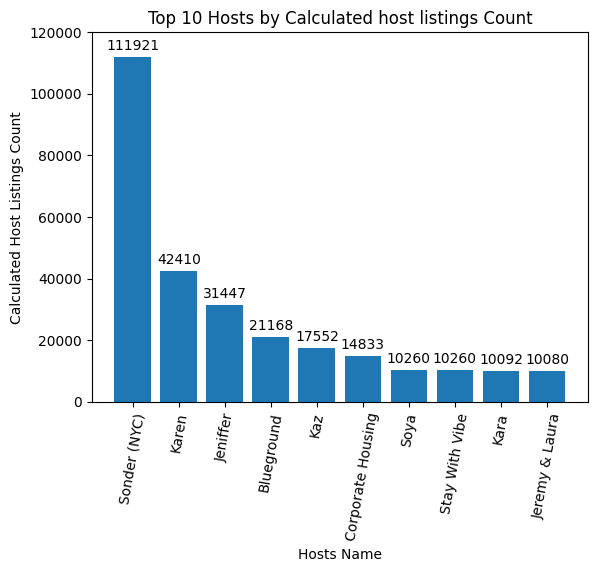

In [126]:
#Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host_name')['calculated_host_listings_count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated_host_listings_count']);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated_host_listings_count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host listings Count');

# The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder (NYC) notably leading with 111,921 listings. Subsequently, the other hosts follow in descending order.

Karen at second position with 42410 hosts

Jeniffer at third position with 31447 hosts

Blueground at fourth position with 21168 hosts

Kaz at fifth position with 17552 hosts

Corporate Housing at sixth position with 14833 hosts

Soya at seventh positon with 10260 hosts

Stay with vibe at eight position with 10260 hosts

Kara at ninth position with 10092 hosts

and finally Jeremy and Laura at tenth position 10080 hosts

# Are hosts with verified identities more likely to receive positive reviews?

In [134]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review_rate_number'].mean().sort_values(ascending = False).to_frame()
review

,review_rate_number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


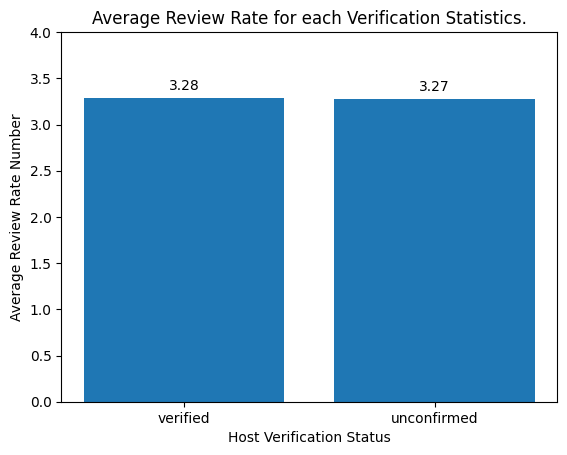

In [136]:
review_bar = plt.bar(review.index, review.loc[:, "review_rate_number"]);
plt.bar_label(review_bar, labels = round(review.loc[:, "review_rate_number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');


The average review rates for verified and unconfirmed hosts are 3.27 and 3.28, respectively, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.

# Is there a correlation between the price of a listing and its service fee?

In [140]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

0.9999909082976459

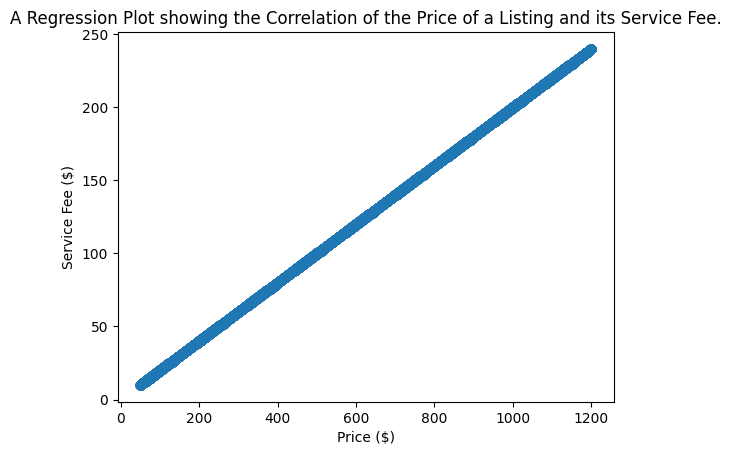

In [142]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
           
plt.ylabel('Service Fee ($)');

plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

The Pearson correlation coefficient between the price and service fee is 0.99, indicating a highly robust positive correlation between these variables. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.

# What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [148]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood_group', 'room_type'])['review_rate_number'].mean().to_frame()
ARRN

review_rate_number
neighbourhood_group room_type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

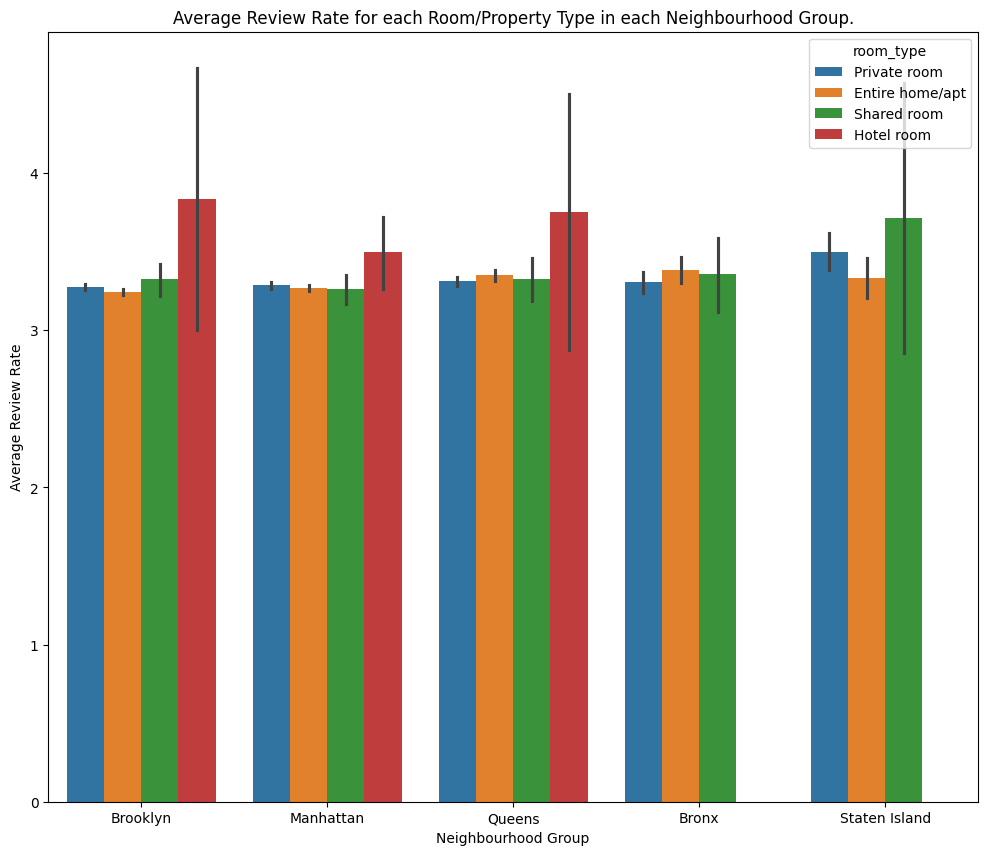

In [152]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood_group', y = 'review_rate_number', hue = 'room_type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located: Brooklyn, Manhattan, and Queens.

# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

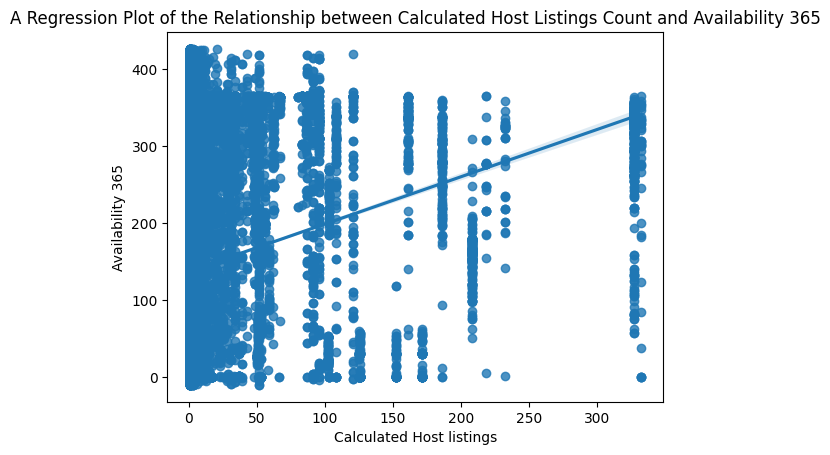

In [156]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated_host_listings_count', y = 'availability_365');
plt.xlabel('Calculated Host listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');


In [158]:
df['calculated_host_listings_count'].corr(df['availability_365'])

0.13599714715703376

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.

# Conclusion

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.
